## Univariate Single Performance

- Train a ML model per every single feature
- Determine the performance of the models
- Select features if model performance is above a certain threshold

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

from feature_engine.selection import SelectBySingleFeaturePerformance

## Classification

(50000, 109)

In [3]:
data.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


**Important**

In all feature selection procedures, it is good practice to select the features by examining only the training set. And this is to avoid overfit.

In [4]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

In [5]:
# set up a machine learning model
rf = RandomForestClassifier(
    n_estimators=10, random_state=1, n_jobs=4)

# set up the selector
sel = SelectBySingleFeaturePerformance(
    variables=None,
    estimator=rf,
    scoring="roc_auc",
    cv=3,
    threshold=0.5)

# find predictive features
sel.fit(X_train, y_train)

SelectBySingleFeaturePerformance(cv=3,
                                 estimator=RandomForestClassifier(bootstrap=True,
                                                                  ccp_alpha=0.0,
                                                                  class_weight=None,
                                                                  criterion='gini',
                                                                  max_depth=None,
                                                                  max_features='auto',
                                                                  max_leaf_nodes=None,
                                                                  max_samples=None,
                                                                  min_impurity_decrease=0.0,
                                                                  min_impurity_split=None,
                                                                  min_samples_leaf=1,
                   

In [6]:
#  the transformer stores a dictionary of feature:metric pairs
# in this case is the roc_auc of each individual model

sel.feature_performance_

{'var_1': 0.48759277104531346,
 'var_2': 0.505848556373206,
 'var_3': 0.4905873006786428,
 'var_4': 0.5012805125652865,
 'var_5': 0.5015503210301652,
 'var_6': 0.5002440532815474,
 'var_7': 0.5053963427797875,
 'var_8': 0.5087215543029918,
 'var_9': 0.49864074839764516,
 'var_10': 0.5039422399116312,
 'var_11': 0.5045241781760413,
 'var_12': 0.5033241886174137,
 'var_13': 0.5012548463154374,
 'var_14': 0.5095474749841596,
 'var_15': 0.5066986262291787,
 'var_16': 0.5770565890399896,
 'var_17': 0.4963318406720993,
 'var_18': 0.5023772724145118,
 'var_19': 0.5014534628266524,
 'var_20': 0.49519324682840477,
 'var_21': 0.5018214387922665,
 'var_22': 0.5030892351407114,
 'var_23': 0.5031365233380981,
 'var_24': 0.4987152429182367,
 'var_25': 0.497173636121741,
 'var_26': 0.4963377682125327,
 'var_27': 0.49770130002860463,
 'var_28': 0.5066248627234153,
 'var_29': 0.5033150006736233,
 'var_30': 0.5062985117443208,
 'var_31': 0.49807356772302774,
 'var_32': 0.495678623121759,
 'var_33': 0.50

Text(0, 0.5, 'roc-auc')

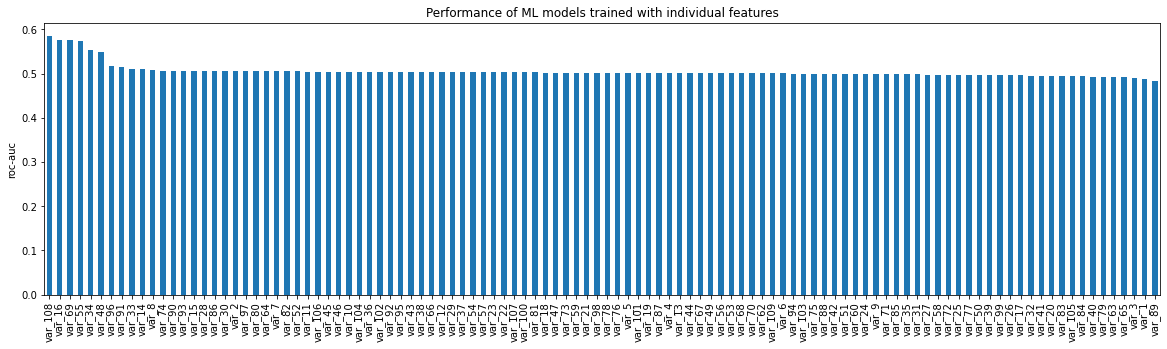

In [7]:
# we can plot feature importance sorted by importance

pd.Series(sel.feature_performance_).sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.title('Performance of ML models trained with individual features')
plt.ylabel('roc-auc')

In [8]:
# the features that will be removed

len(sel.features_to_drop_)

36

In [9]:
# remove non-prective features

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((35000, 72), (15000, 72))

## Regression

### with r2 and user specified threshold

In [3]:
# load dataset

data = pd.read_csv('../houseprice.csv')

data.shape

(1460, 81)

In [4]:
# I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [5]:
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [6]:
# fill missing values
data.fillna(0, inplace=True)

In [7]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Id','SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 36), (438, 36))

In [8]:
# set up the machine learning model
rf = RandomForestRegressor(
    n_estimators=10, max_depth=2, random_state=1, n_jobs=4)

# set up the selector
sel = SelectBySingleFeaturePerformance(
    variables=None,
    estimator=rf,
    scoring="r2",
    cv=3,
    threshold=0.5)

# find predictive features
sel.fit(X_train, y_train)

SelectBySingleFeaturePerformance(cv=3,
                                 estimator=RandomForestRegressor(bootstrap=True,
                                                                 ccp_alpha=0.0,
                                                                 criterion='mse',
                                                                 max_depth=2,
                                                                 max_features='auto',
                                                                 max_leaf_nodes=None,
                                                                 max_samples=None,
                                                                 min_impurity_decrease=0.0,
                                                                 min_impurity_split=None,
                                                                 min_samples_leaf=1,
                                                                 min_samples_split=2,
                                

In [9]:
# the transformer stores a dictionary of feature:metric pairs
# notice that the r2 can be positive or negative.
# the selector selects based on the absolute value

sel.feature_performance_

{'MSSubClass': 0.18514034601982418,
 'LotFrontage': 0.11295437960824546,
 'LotArea': 0.18072827270865235,
 'OverallQual': 0.6390607189504983,
 'OverallCond': 0.10099732436450067,
 'YearBuilt': 0.34969187588528144,
 'YearRemodAdd': 0.2601114121308128,
 'MasVnrArea': 0.1673999965292691,
 'BsmtFinSF1': 0.19898086671343473,
 'BsmtFinSF2': -0.009703547431066198,
 'BsmtUnfSF': 0.05878832827833499,
 'TotalBsmtSF': 0.4067200681744638,
 '1stFlrSF': 0.345102029766815,
 '2ndFlrSF': 0.21988067672483705,
 'LowQualFinSF': -0.025701997588528352,
 'GrLivArea': 0.47416720514000604,
 'BsmtFullBath': 0.03495762648889167,
 'BsmtHalfBath': -0.024767451129236395,
 'FullBath': 0.33009421507209774,
 'HalfBath': 0.0706292027025724,
 'BedroomAbvGr': 0.041702761473751515,
 'KitchenAbvGr': 0.0013083175726592937,
 'TotRmsAbvGrd': 0.2638005756723682,
 'Fireplaces': 0.22352442100930425,
 'GarageYrBlt': 0.3244535905924391,
 'GarageCars': 0.47450883716087217,
 'GarageArea': 0.40288417091771045,
 'WoodDeckSF': 0.083104

Text(0, 0.5, 'r2')

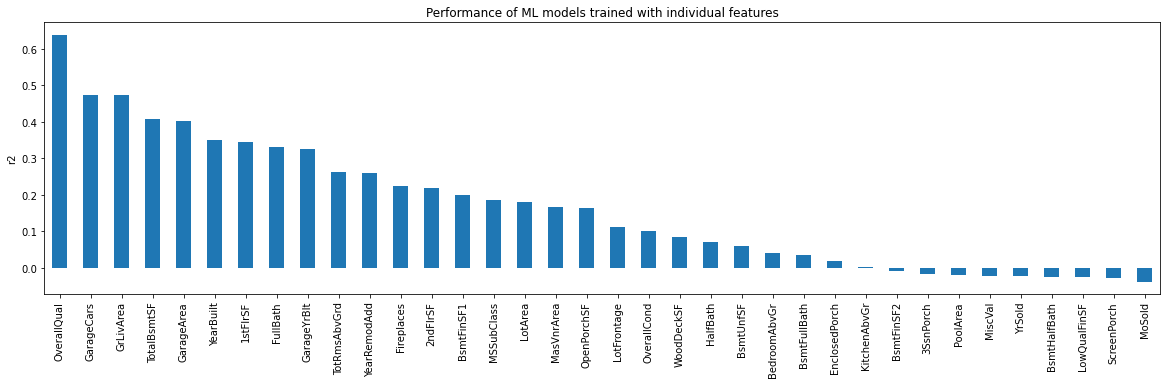

In [10]:
pd.Series(sel.feature_performance_).sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.title('Performance of ML models trained with individual features')
plt.ylabel('r2')

Text(0, 0.5, 'r2 - absolute value')

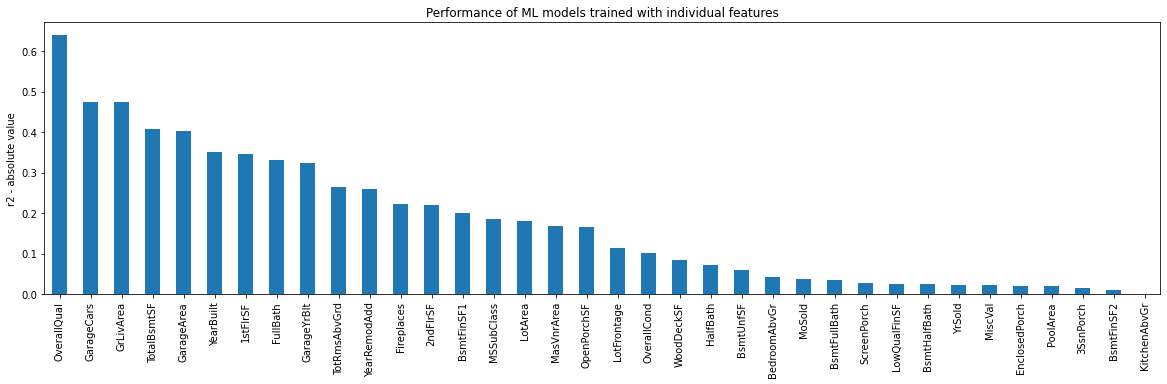

In [11]:
# same plot but taking the absolute value of the r2

np.abs(pd.Series(sel.feature_performance_)).sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.title('Performance of ML models trained with individual features')
plt.ylabel('r2 - absolute value')

In [12]:
# the features that will be removed

len(sel.features_to_drop_)

35

In [13]:
# select features in the dataframes

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((1022, 1), (438, 1))

### Automatically select threshold

If we leave the threshold to None, the threshold will be automatically specified as the mean of performance of all features.

In [14]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Id','SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 36), (438, 36))

In [15]:
# set up the machine learning model
rf = RandomForestRegressor(
    n_estimators=10, max_depth=2, random_state=1, n_jobs=4)

# set up the selector
sel = SelectBySingleFeaturePerformance(
    variables=None,
    estimator=rf,
    scoring="neg_mean_squared_error",
    cv=3,
    threshold=None)

# find predictive features
sel.fit(X_train, y_train)

SelectBySingleFeaturePerformance(cv=3,
                                 estimator=RandomForestRegressor(bootstrap=True,
                                                                 ccp_alpha=0.0,
                                                                 criterion='mse',
                                                                 max_depth=2,
                                                                 max_features='auto',
                                                                 max_leaf_nodes=None,
                                                                 max_samples=None,
                                                                 min_impurity_decrease=0.0,
                                                                 min_impurity_split=None,
                                                                 min_samples_leaf=1,
                                                                 min_samples_split=2,
                                

In [16]:
# the transformer stores a dictionary of feature:metric pairs
# the selector will select those features with neg mean squared error
# bigger than the mean of the neg squared error of all features

sel.feature_performance_

{'MSSubClass': -4946270056.549981,
 'LotFrontage': -5343492813.892375,
 'LotArea': -4928459117.321639,
 'OverallQual': -2193369380.493084,
 'OverallCond': -5448634768.315696,
 'YearBuilt': -3962171141.8131747,
 'YearRemodAdd': -4491466004.666675,
 'MasVnrArea': -4989419433.834832,
 'BsmtFinSF1': -4781178509.147069,
 'BsmtFinSF2': -6114101356.530289,
 'BsmtUnfSF': -5733048337.536067,
 'TotalBsmtSF': -3592806788.9542003,
 '1stFlrSF': -3926595795.1685433,
 '2ndFlrSF': -4723468623.759179,
 'LowQualFinSF': -6215527247.916032,
 'GrLivArea': -3196235551.3794694,
 'BsmtFullBath': -5841851990.276611,
 'BsmtHalfBath': -6209234331.852562,
 'FullBath': -4111826645.2049403,
 'HalfBath': -5635203820.852725,
 'BedroomAbvGr': -5827807934.638268,
 'KitchenAbvGr': -6043745816.133111,
 'TotRmsAbvGrd': -4442659307.3334255,
 'Fireplaces': -4698230724.431931,
 'GarageYrBlt': -4099773671.5096774,
 'GarageCars': -3202894600.2360916,
 'GarageArea': -3616607624.57791,
 'WoodDeckSF': -5528025759.633686,
 'OpenPo

Text(0, 0.5, 'Negative mean Squared Error')

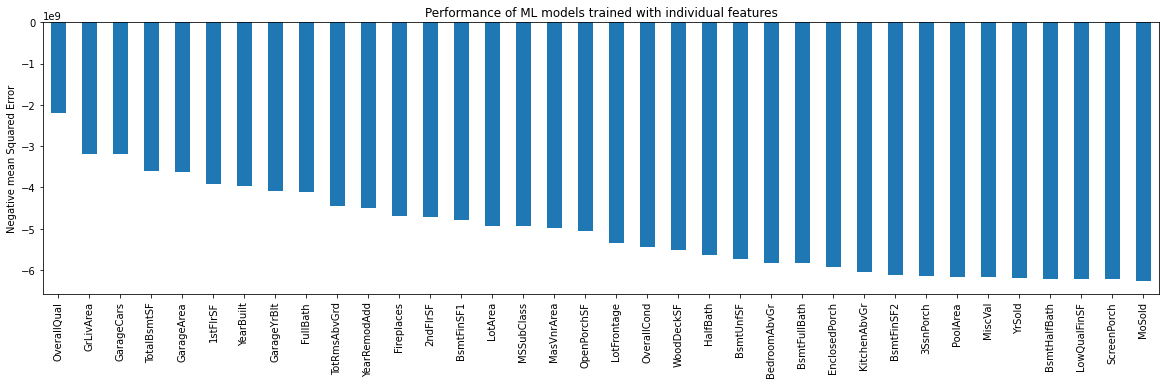

In [17]:
pd.Series(sel.feature_performance_).sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.title('Performance of ML models trained with individual features')
plt.ylabel('Negative mean Squared Error')

In [18]:
# the features that will be dropped
sel.features_to_drop_

['LotFrontage',
 'OverallCond',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

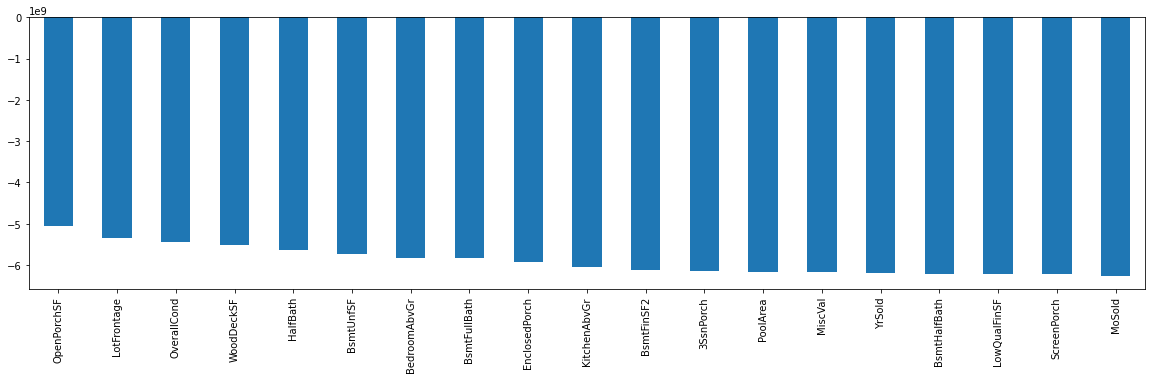

In [20]:
# note that these features have the biggest negative mean squared error
pd.Series(sel.feature_performance_)[sel.features_to_drop_].sort_values(ascending=False).plot.bar(figsize=(20, 5))